In [57]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install kagglehub[pandas-datasets]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [59]:
#Get the Cheese data from Kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "cheese_data.csv"

CheeseDatadf = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "noahjanes/canadian-cheese-directory",
  file_path,
)

print("First 5 records:", CheeseDatadf.head())

C:\Users\somto\AppData\Local\Temp\ipykernel_38504\94478273.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  CheeseDatadf = kagglehub.load_dataset(


First 5 records:    CheeseId ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  \
0       228                   NB           Farmstead             47.0   
1       242                   NB           Farmstead             47.9   
2       301                   ON          Industrial             54.0   
3       303                   NB           Farmstead             47.0   
4       319                   NB           Farmstead             49.4   

                                          FlavourEn  \
0                                     Sharp, lactic   
1                Sharp, lactic, lightly caramelized   
2                           Mild, tangy, and fruity   
3  Sharp with fruity notes and a hint of wild honey   
4                                      Softer taste   

                                   CharacteristicsEn  Organic  \
0                                           Uncooked        0   
1                                           Uncooked        0   
2  Pressed and coo

In [60]:
#Remove every column except 'CheeseId', 'ManufacturerProvCode', 'MoisturePercent', 'Organic', 'CategoryTypeEn', 'FatLevel'
CheeseDatadf = CheeseDatadf[['CheeseId', 'ManufacturerProvCode', 'MoisturePercent', 'Organic', 'CategoryTypeEn', 'FatLevel']]

In [61]:
print("Cheese Data Columns info:", CheeseDatadf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   MoisturePercent       1028 non-null   float64
 3   Organic               1042 non-null   int64  
 4   CategoryTypeEn        1019 non-null   object 
 5   FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 49.0+ KB
Cheese Data Columns info: None


In [62]:
# Fill missing values in 'MoisturePercent' with the mean of the column
CheeseDatadf['MoisturePercent'].fillna(CheeseDatadf['MoisturePercent'].mean(), inplace=True)

# Fill missing values in 'Organic' with 'Unknown'
CheeseDatadf['Organic'].fillna('Unknown', inplace=True)

# Check the result
print(CheeseDatadf.head())

   CheeseId ManufacturerProvCode  MoisturePercent  Organic    CategoryTypeEn  \
0       228                   NB             47.0        0       Firm Cheese   
1       242                   NB             47.9        0  Semi-soft Cheese   
2       301                   ON             54.0        0       Firm Cheese   
3       303                   NB             47.0        0    Veined Cheeses   
4       319                   NB             49.4        1  Semi-soft Cheese   

    FatLevel  
0  lower fat  
1  lower fat  
2  lower fat  
3  lower fat  
4  lower fat  


C:\Users\somto\AppData\Local\Temp\ipykernel_38504\17002324.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CheeseDatadf['MoisturePercent'].fillna(CheeseDatadf['MoisturePercent'].mean(), inplace=True)
C:\Users\somto\AppData\Local\Temp\ipykernel_38504\17002324.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [63]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "canada_weather.csv"

# Load the latest version
CanadaWeatherdf = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "hemil26/canada-weather",
  file_path,
  pandas_kwargs={"encoding": "utf-8"},
)

C:\Users\somto\AppData\Local\Temp\ipykernel_38504\1396991041.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  CanadaWeatherdf = kagglehub.load_dataset(


In [64]:
# Check for missing values
print("Missing values in Canada weather data:", CanadaWeatherdf.isnull().sum())

Missing values in Canada weather data: Community                     0
Weather station               3
Location                      0
Elevation                     0
January(Avg. high °C (°F))    0
January(Avg. low °C (°F))     0
July(Avg. high °C (°F))       0
July(Avg. low °C (°F))        0
Annual(Avg. high °C (°F))     0
Annual(Avg. low °C (°F))      0
dtype: int64


In [65]:
#Drop 'Location' column
CanadaWeatherdf = CanadaWeatherdf.drop(columns=['Location', 'Elevation'])

# Extract the province from the 'Community' column
CanadaWeatherdf['Province'] = CanadaWeatherdf['Community'].str[-2:]

import re

# Remove everything inside brackets (and the brackets themselves) from all string columns in CanadaWeatherdf

def strip_brackets(s):
    if isinstance(s, str):
        return re.sub(r'\s*\(.*?\)', '', s)
    return s

for col in CanadaWeatherdf.select_dtypes(include='object').columns:
    CanadaWeatherdf[col] = CanadaWeatherdf[col].apply(strip_brackets)

CanadaWeatherdf.head()

CanadaWeatherdf.head()

,Community,Weather station,January(Avg. high °C (°F)),January(Avg. low °C (°F)),July(Avg. high °C (°F)),July(Avg. low °C (°F)),Annual(Avg. high °C (°F)),Annual(Avg. low °C (°F)),Province
0,"Alberton, PE",NaN,−3.9,−12.5,23.2,14.1,9.6,1.3,PE
1,"Baker Lake, NU",YBK,−27.7,−34.8,17.0,6.1,−7.3,−15.2,NU
2,"Baie-Comeau, QC",YBC,−8.7,−19.9,20.9,10.3,6.6,−3.3,QC
3,"Calgary, AB",YYC,−0.9,−13.2,23.2,9.8,10.8,−1.9,AB
4,"Charlottetown, PE",YYG,−3.4,−12.1,23.3,14.1,9.9,1.3,PE


In [66]:
# Group CheeseDatadf by province and calculate the count of cheeses per province
cheese_by_province = CheeseDatadf.groupby('ManufacturerProvCode').size().reset_index(name='CheeseCount')

# Prepare CanadaWeatherdf: convert temperature columns to numeric (handle possible non-numeric values)
for col in ['Annual(Avg. high °C (°F))', 'Annual(Avg. low °C (°F))']:
    CanadaWeatherdf[col] = pd.to_numeric(CanadaWeatherdf[col], errors='coerce')

# Calculate average annual high and low temperature per province
weather_by_province = CanadaWeatherdf.groupby('Province').agg({
    'Annual(Avg. high °C (°F))': 'mean',
    'Annual(Avg. low °C (°F))': 'mean'
}).reset_index()

# Merge cheese and weather data on province code
province_comparison = pd.merge(
    cheese_by_province,
    weather_by_province,
    left_on='ManufacturerProvCode',
    right_on='Province',
    how='inner'
)

print(province_comparison)

  ManufacturerProvCode  CheeseCount Province  Annual(Avg. high °C (°F))  \
0                   AB           13       AB                   8.433333   
1                   BC           65       BC                  12.240000   
2                   MB           11       MB                   6.050000   
3                   NB           27       NB                  10.533333   
4                   NL            2       NL                   6.566667   
5                   NS           10       NS                  10.900000   
6                   ON          115       ON                  11.650000   
7                   PE            2       PE                   9.800000   
8                   QC          796       QC                   9.100000   
9                   SK            1       SK                   7.933333   

   Annual(Avg. low °C (°F))  
0                       NaN  
1                  4.075000  
2                       NaN  
3                  0.100000  
4                  1.150

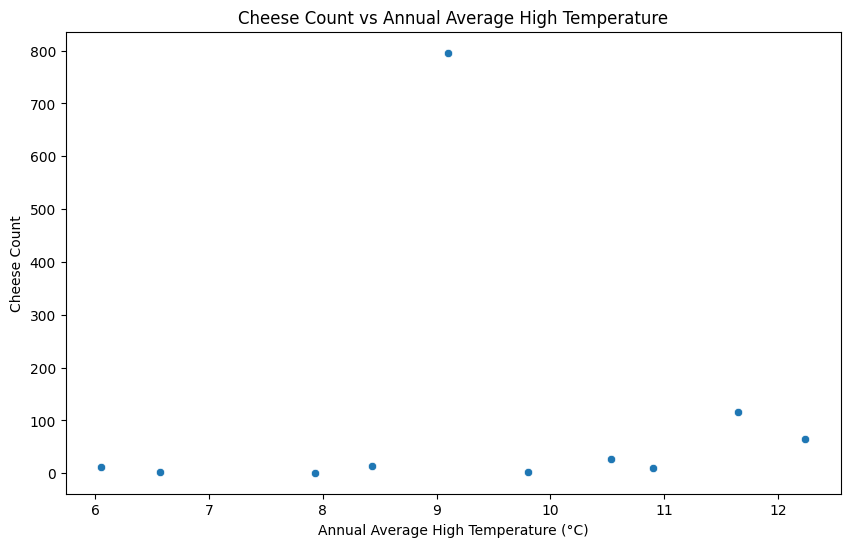

In [67]:
# Plot the relationship between cheese count and temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=province_comparison, x='Annual(Avg. high °C (°F))', y='CheeseCount')
plt.title('Cheese Count vs Annual Average High Temperature')
plt.xlabel('Annual Average High Temperature (°C)')
plt.ylabel('Cheese Count')
plt.show()

# Cheese Count vs Annual Average High Temperature Analysis

This plot suggests that provinces with higher average temperatures tend to produce slightly more cheese varieties. Notably, there is a significant peak in cheese count around the 9°C mark. Additionally, provinces with average high temperatures near 12°C show a modest increase in cheese production compared to those with lower temperatures. Overall, while temperature appears to have some influence, other factors may also contribute to the distribution of cheese production across provinces.

<Figure size 1200x600 with 0 Axes>

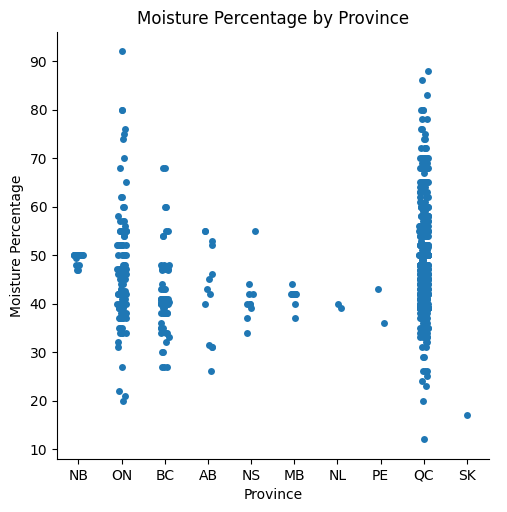

In [68]:
#Plot the relationship between province and moisture percentage
plt.figure(figsize=(12, 6))
sns.catplot(data=CheeseDatadf, x='ManufacturerProvCode', y='MoisturePercent')
plt.title('Moisture Percentage by Province')
plt.xlabel('Province')
plt.ylabel('Moisture Percentage')
plt.show()

# Moisture Percentage by Province Analysis

These results indicate that Quebec, Ontario, and British Columbia (BC) not only produce a greater variety of cheeses but also offer a wider range of moisture percentages. This suggests that the climates in these provinces are particularly favorable for cheese production. In contrast, provinces such as Saskatchewan and Newfoundland have the lowest cheese output. BC and Ontario tend to produce cheeses with moisture levels between 30% and 55%, while Quebec’s production spans a broader range from 25% to 80%. New Brunswick primarily produces cheeses with moisture content around 50%.